In [67]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import seaborn as sns 
from matplotlib.ticker import MaxNLocator

In [68]:
#Read file

df_titanic = pd.read_csv('./data/train.csv')

In [69]:
#Q(1)

df_titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [70]:
#Q(2)

print("Columns: ")

i = 1
for columns in df_titanic.columns:
    print(i, "-" , columns)
    i = i +1

Columns: 
1 - PassengerId
2 - Survived
3 - Pclass
4 - Name
5 - Sex
6 - Age
7 - SibSp
8 - Parch
9 - Ticket
10 - Fare
11 - Cabin
12 - Embarked


In [71]:
#Q(3)

size = df_titanic.index.size

print("size of the dataset: ", size, "(only passengers)")

size of the dataset:  891 (only passengers)


In [72]:
#Q(4)
# 177 - 687 - 2

age = df_titanic['Age'].isna().sum()
print("Null ages:",age)

cabin = df_titanic['Cabin'].isna().sum()
print("Null cabins:",cabin)

embarked = df_titanic['Embarked'].isna().sum()
print("Null embarked:",embarked)

Null ages: 177
Null cabins: 687
Null embarked: 2


In [73]:
#Cleaning columns which has NaN cells
new_df_titanic = df_titanic.dropna()

#checking new dataset length
size = new_df_titanic.index.size

print("size of the dataset: ", size, "(only passengers)")

size of the dataset:  183 (only passengers)


Text(0, 0.5, 'Ports')

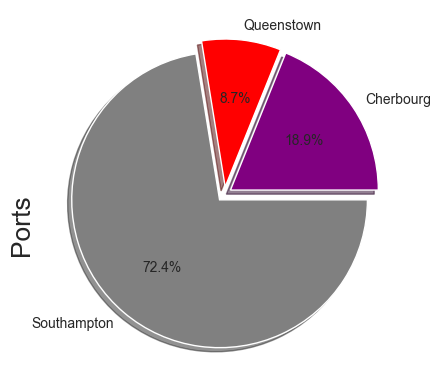

In [74]:
#Q(5)
#Southampton - most number of people embarked.
#Queenstown - least number of people embarked.

colors = ['purple', 'red', 'grey']
explodes = (0.05, 0.05, 0.05)

country_data = ["Cherbourg","Queenstown", "Southampton"]

x = df_titanic.groupby('Embarked').size()
x.plot(kind='pie', fontsize = 10, labels = country_data, explode = explodes, colors = colors, autopct='%1.1f%%', shadow=True)
mp.ylabel("Ports", horizontalalignment = 'right', fontsize = 19)

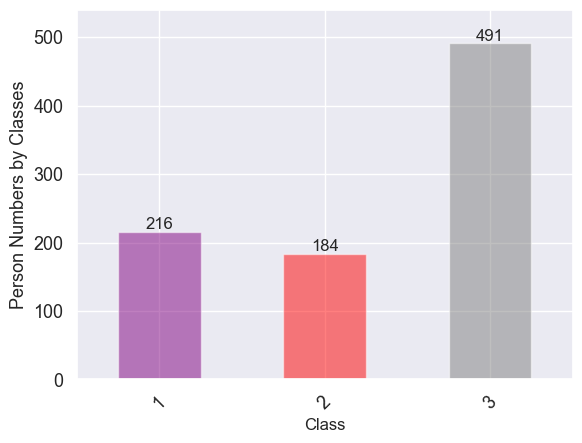

In [75]:
#Q(6)
#3rd class had the most number of passengers.

sns.set(style="darkgrid")

colors = ['purple', 'red', 'grey']
class_array = ["1","2","3"]

class_data = df_titanic.groupby('Pclass').size()
ax = class_data.plot(kind='bar', fontsize = 13, color = colors, alpha=0.5, rot = 45)

mp.ylabel("Person Numbers by Classes", horizontalalignment = 'center', fontsize = 13)
mp.xlabel("Class")

for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', label_type='edge')
    
ax.margins(y=0.1)

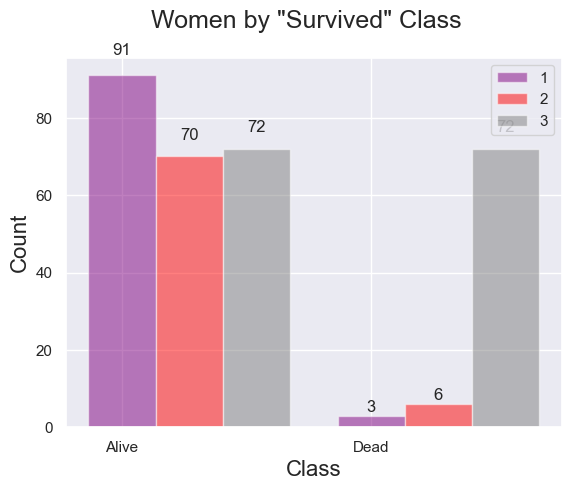

In [76]:
#Q(7)

sns.set(style="darkgrid")
colors = ['purple', 'red', 'grey']

ind = np.arange(2)

woman_data = df_titanic[df_titanic['Sex'] == "female"]

df1 = woman_data[woman_data['Pclass'] == 1]['Survived'].value_counts()
df2 = woman_data[woman_data['Pclass'] == 2]['Survived'].value_counts()
df3 = woman_data[woman_data['Pclass'] == 3]['Survived'].value_counts()

width = 0.27     

fig = mp.figure()
ax = fig.add_subplot(111)

data1 = ax.bar(ind, df1, width, color=colors[0], alpha = 0.5)

data2 = ax.bar(ind+width, df2, width, color=colors[1], alpha = 0.5)

data3 = ax.bar(ind+width*2, df3, width, color=colors[2], alpha = 0.5)


#design part :)
ax.set_ylabel('Count')

fig.suptitle('Women by "Survived" Class', fontsize=18)
mp.ylabel('Count', fontsize=16)
mp.xlabel('Class', fontsize=16)

labels = list(["Alive","Dead"])
def format_fn(tick_val, tick_pos):
    if int(tick_val) in range(2):
        return labels[int(tick_val)]
    else:
        return ''

ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.legend(["1","2","3"]);

def autolabel(data):
    for rect in data:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(data1)
autolabel(data2)
autolabel(data3)


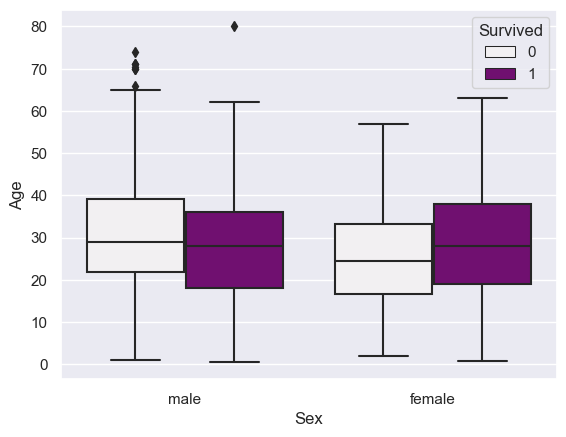

In [77]:
#Q(8)

sns.set(style="darkgrid")

colors = ['purple', 'red']

df = pd.DataFrame({
    'Age': df_titanic['Age'],
    'Survived': df_titanic['Survived'], 
    'Sex': df_titanic['Sex']
                })

sns.boxplot(y='Age', x='Sex', data=df, hue='Survived', color = 'purple')
mp.show()


In [78]:
#Q(9-10)
#females had a higher survival rate. because females and children have priority in social norms.

pd.crosstab(df_titanic.Sex, df_titanic.Survived, margins=True, margins_name="Total")

Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


<AxesSubplot: >

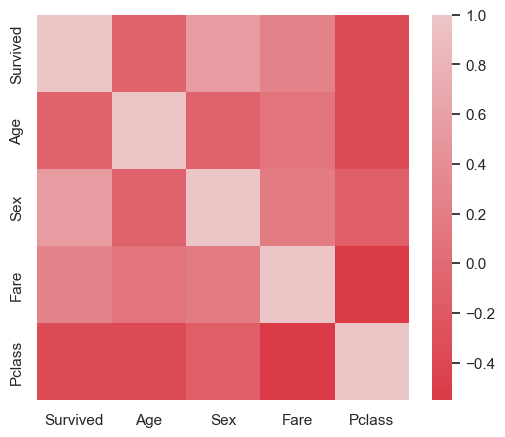

In [79]:
#Q(11)

new = df_titanic.copy()

new['Sex'] = new['Sex'].replace(['female'],1)
new['Sex'] = new['Sex'].replace(['male'],0)

df = pd.DataFrame({'Survived': df_titanic['Survived'],
                   'Age': df_titanic['Age'],
                   'Sex': new['Sex'],
                   'Fare': df_titanic['Fare'],
                   'Pclass': df_titanic['Pclass']})

cols = ['Survived','Age', 'Sex', 'Fare', 'Pclass']
correlation = df[cols].corr()

#design :)
f, ax = mp.subplots(figsize=(6, 5))

cmap = sns.diverging_palette(10, 30, as_cmap=True)

sns.heatmap(correlation, annot=False, cmap=cmap, center = 1.5)

<AxesSubplot: >

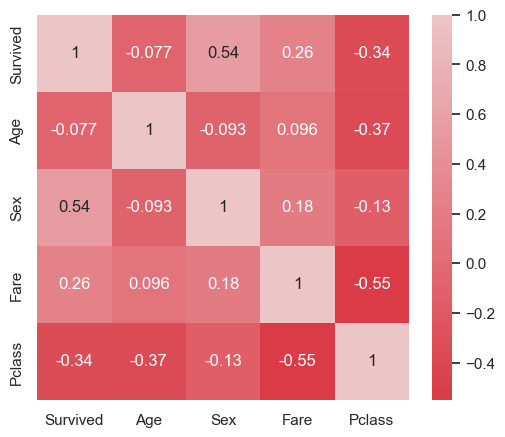

In [80]:
#Q(12)
#We can say this: as the number of classes increases, the survival rate decreases. I think this situation shows the class distinction.

new = df_titanic.copy()

new['Sex'] = new['Sex'].replace(['female'],1)
new['Sex'] = new['Sex'].replace(['male'],0)

df = pd.DataFrame({'Survived': df_titanic['Survived'],
                   'Age': df_titanic['Age'],
                   'Sex': new['Sex'],
                   'Fare': df_titanic['Fare'],
                   'Pclass': df_titanic['Pclass']})

cols = ['Survived','Age', 'Sex', 'Fare', 'Pclass']

correlation = df[cols].corr(method="pearson")

f, ax = mp.subplots(figsize=(6, 5))

cmap = sns.diverging_palette(10, 30, as_cmap=True)

sns.heatmap(correlation, annot=True, cmap=cmap, center = 1.5)

In [81]:
#Q(13)

minAge = df_titanic["Age"].min()
person = df_titanic[df_titanic["Age"] == minAge].Name.item()
gender = df_titanic[df_titanic["Name"] == person].Sex.item()

if gender == "male":
    print(person," is the youngest person and his age is ", minAge)
else:
    print(person," is the youngest person and her age is ", minAge)

Thomas, Master. Assad Alexander  is the youngest person and his age is  0.42


In [82]:
#Q(14)

averageFare = df_titanic['Fare'].mean()

print("Average Fare:",averageFare)

Average Fare: 32.204207968574636


In [83]:
#Q(15)

oldest = int(df_titanic.loc[df_titanic['Survived'] == 1, 'Age'].max())
person = df_titanic[df_titanic["Age"] == oldest].Name.item()
gender = df_titanic[df_titanic["Name"] == person].Sex.item()

if gender == "male":
    print(person,"is the oldest person alive and his age is", oldest)
else:
    print(person,"is the oldest person alive and her age is", oldest)

Barkworth, Mr. Algernon Henry Wilson is the oldest person alive and his age is 80


In [84]:
#Q(16)

women = new_df_titanic[new_df_titanic['Sex'] == "female"]
oldest = int(women.loc[women['Survived'] == 1, 'Age'].max())
person = women.loc[women['Age'] == oldest].Name.item()

print(person ,"is the oldest woman alive and her age is", oldest)


Andrews, Miss. Kornelia Theodosia is the oldest woman alive and her age is 63


In [85]:
#Q(17)
#Virginia Ethel is travelling without parents. I think she might going to parents or she is an orphan. :(

child = df_titanic[(df_titanic['Age'] <= 10) & (df_titanic['Parch'] == 0)]

childs = []

for x in child['Name']:
    childs.append(x)
        
for y in childs:
    print(y, "is travelling without parents.")

Emanuel, Miss. Virginia Ethel is travelling without parents.


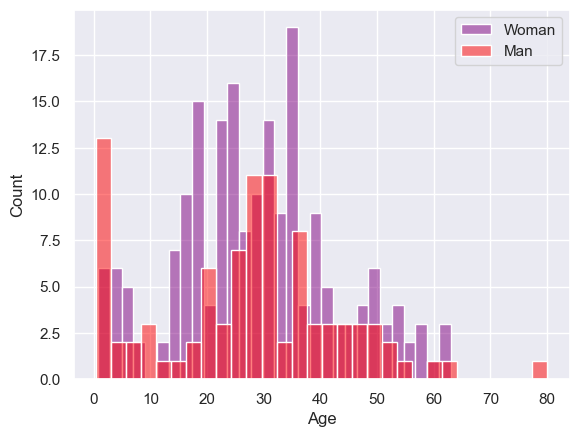

In [86]:
#Q(18)
# I think we can not say anything about the survival rate for this histogram. 
# Because we do not have all numbers here. 
# But if we must say something about it we can maybe say this: Alive women has a higher survival chance.

sns.set(style="darkgrid")

survived = df_titanic[df_titanic['Survived'] == 1]

women = survived.loc[survived['Sex'] == "female", 'Age']
men = survived.loc[survived['Sex'] == "male", 'Age']

sns.histplot(women, color = 'purple', bins = 30, alpha = 0.5, label="Woman")
sns.histplot(men, color = 'red', bins = 30, alpha = 0.5, label="Man")

mp.legend()
mp.show()

In [87]:
#Q(19)

sibling = df_titanic['SibSp']
maxS = int(df_titanic['SibSp'].max())
name = df_titanic.loc[df_titanic['SibSp'] == maxS].Name.tolist()

print(name[0], "has the highest number of siblings and has",maxS,"siblings.")

Sage, Master. Thomas Henry has the highest number of siblings and has 8 siblings.


Text(0, 0.5, 'Fare')

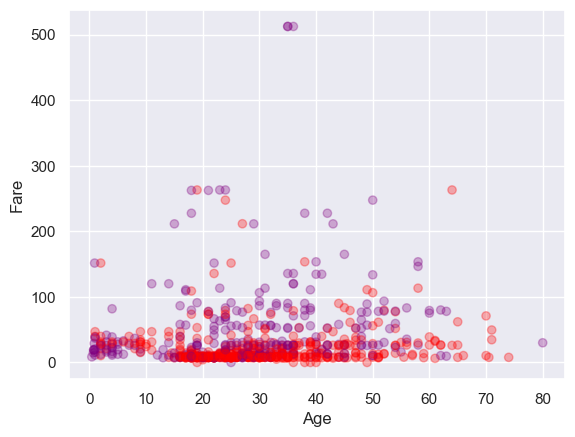

In [88]:
#Q(20)

nonSurvived = df_titanic[df_titanic['Survived'] == 0]
survived = df_titanic[df_titanic['Survived'] == 1]


colors = {0:'red', 1:'purple'}

mp.scatter(df_titanic['Age'], df_titanic['Fare'], alpha=0.3, c= df_titanic['Survived'].map(colors))

mp.xlabel("Age")
mp.ylabel("Fare")
